Before you turn in this homework, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel $\rightarrow$ Restart) and then run all cells (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you execute every single code cell, in order, filling with your solutions in any place that says `# YOUR CODE HERE`, and always DELETE the line that says:

```python
raise NotImplementedError()
```

The purpose of this line is to tell you if you forgot to answer a question (it will throw an error if the line is there)

**IMPORTANT:** DO NOT DELETE ANY CELL and do not change the title of the Notebook.

Fill your name below:

In [1]:
name = "ChingTang Lin"

# Coding Assignment: Rocket

The equations of motion for a rocket in purely vertical flight are given by

$$
\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}
$$

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./figures/burn_rate.png)

that is,

$$
\begin{equation}
    \dot{m}_p \left( t \right) =
    \begin{cases}
        20 & \quad \text{if} \quad t < 5 \\
        0 & \quad \text{otherwise}
    \end{cases}
\end{equation}
$$

Using Euler's method with a time-step size of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.

---

## Implement your solution

Implement your solution in this section.
You can use as many code cells as you want.

In [2]:
import math as mat
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [3]:
#parameters
ms = 50           #weight of the rocket shell [kg]
g = 9.81          #gravitational acceleration [m/s^2]
ρ = 1.091         #average air density [kg/m^3]
r = 0.5           #radius of the rocket [m]
ve = 325          #exhaust speed [m/s]
CD = 0.15         #drag coefficinet
mp0 = 100         #initial weight of the rocket propellant


#initial condition
h0 = 0            #initial height [m]
v0 = 0            #initial velocity [m/s]

In [4]:
def mpr(t):
    if t < 5:
        return 20
    else:
        return 0

dt = 0.1
T = 50
N = int(T/dt)+1
t = np.linspace(0.0, T, num=N)
A = mat.pi*r**2

mp = np.zeros(N)
mp[0] = mp0

for n in range (N):
    if n < 5/dt:
        mp[n] = mp0 - mpr(n*dt)*n*dt
    else:
        mp[n] = 0.0

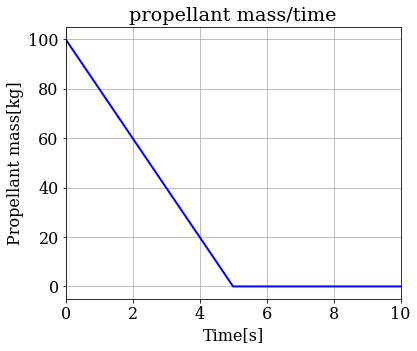

In [5]:
plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=16
plt.figure(figsize=(6, 5))
plt.plot(t, mp, color='b', linestyle='-', linewidth=2)
plt.title('propellant mass/time')
plt.xlabel('Time[s]')
plt.ylabel('Propellant mass[kg]')
plt.xlim(0,10)
plt.grid()

In [6]:
def f(u):
    v = u[0]
    h = u[1]
    return np.array([-g + 1/(ms + mp[n])*ve*mpr(n*dt)-1/2/(ms+mp[n])*ρ*v*np.abs(v)*A*CD,
                     v])

def euler_step(u, f, dt):
    
    return u + dt*f(u)

u = np.empty((N, 2))
u[0] = np.array([v0, h0])

for n in range(N - 1):
    u[n + 1] = euler_step(u[n], f, dt)

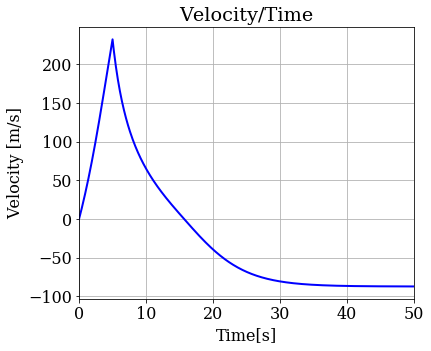

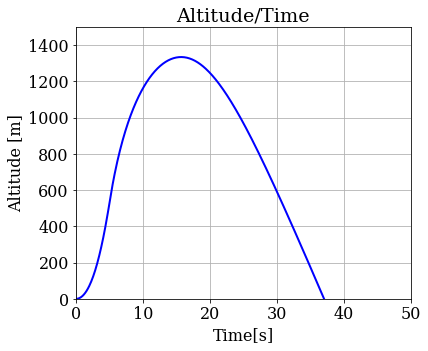

In [7]:
v = u[:,0]
h = u[:,1]

plt.figure(figsize=(6,5))
plt.plot(t,v,color='b', linestyle='-', linewidth=2)
plt.title('Velocity/Time')
plt.xlabel('Time[s]')
plt.ylabel('Velocity [m/s]')
plt.xlim(0, 50)
plt.grid()


plt.figure(figsize=(6,5))
plt.plot(t,h,color='b', linestyle='-', linewidth=2)
plt.title('Altitude/Time')
plt.xlabel('Time[s]')
plt.ylabel('Altitude [m]')
plt.xlim(0, 50)
plt.ylim(0, 1500)
plt.grid()

---

## Assessment

In [8]:
# Import module to check answers.
import mooc

Answer questions in this section.

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket? 

_Instructions:_

* Store the value of the remaining propellant using a variable called `m_p`.
You can call the function `mooc.check('hw1_answer1', m_p)` to check you got the correct answer. The function will print `'Good job!'` if you got it right, `'Try again!'` otherwise.

In [9]:
t1 = 3.2
m_p = mp0 - mpr(3.2)*t1
mooc.check('hw1_answer1',m_p)

[hw1_answer1] Good job!


2. What is the maximum speed of the rocket in $\frac{m}{s}$? At what time does this occur (in seconds)? What is the altitude at this time (in meters)?

_Instructions:_

* Store the maximum speed in the variable `vmax`, check your answer with `mooc.check('hw1_answer2', vmax)`.
* Store the time in `t_vmax`, check your answer with `mooc.check('hw1_answer3', t_vmax)`.
* Store the altitude in the variable `h_vmax`, check your answer with `mooc.check('hw1_answer4', h_vmax)`.

In [10]:
vmax = max(u[:,0])

for n in range (N - 1):
    if u[n,0] == vmax:
        break
    

T_hmax = n
t_vmax = T_hmax*dt
h_vmax = u[int(5/dt), 1]

mooc.check('hw1_answer2', vmax)
mooc.check('hw1_answer3', t_vmax)
mooc.check('hw1_answer4', h_vmax)

[hw1_answer2] Good job!
[hw1_answer3] Good job!
[hw1_answer4] Good job!


3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

_Instructions:_

* Store the maximum altitude in the variable `hmax`, check your answer with `mooc.check('hw1_answer5', hmax)`.
* Store the time in the variable `t_hmax`, check your answer with `mooc.check('hw1_answer6', t_hmax)`.

In [11]:
hmax = max(u[:,1])

for n in range(N-1):
    if u[n,1] == hmax:
        break

T_hmax = n
t_hmax = T_hmax*dt

mooc.check('hw1_answer5', hmax)
mooc.check('hw1_answer6', t_hmax)

[hw1_answer5] Good job!
[hw1_answer6] Good job!


4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

_Instructions:_

* Store the time of impact in the variable `t_impact`, check your answer with `mooc.check('hw1_answer7', t_impact)`.
* Store the impact velocity in the variable `v_impact`, check your answer with `mooc.check('hw1_answer8', v_impace)`.

In [12]:
IP = np.where(h<0.0) [0][0]
ta, tb = t[IP-1], t[IP]
va, vb = v[IP-1], v[IP]
ha, hb = h[IP-1], h[IP]

Timpact = np.interp(0.0, [hb, ha], [tb, ta])
Vimpact = np.interp(Timpact, [ta, tb], [va, vb])

mooc.check('hw1_answer7', Timpact)
mooc.check('hw1_answer8', Vimpact)

[hw1_answer7] Good job!
[hw1_answer8] Try again!


---

## Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

Newton's second law states that the acceleration of the vehicle times its mass is equal to all the forces acting on it. Therefore,

\begin{equation}
(m_s + m_p)\frac{d\bf{v}}{dt}=\sum {\bf F}.
\end{equation}
In the above formula we have assumed that the propellant inside the rocket and the rocket move at the same velocity (in other words, their relative velocity is negligible). 

Two of the external forces acting on the rocket are,

\begin{align}
{\bf F}_g&= (m_s+m_p)\bf{g} \quad (\rm{Gravity}),\\
{\bf F}_d&= - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D \quad (\rm{Drag}).
\end{align}

We also need to consider the force resulting from the ejection of the propellant. During an interval $dt$, the engine of the rocket ejects downwards a mass of propellant given by $\dot m_p dt$. Relative to the rocket, the speed of the ejected burning gas is assumed constant and equal to $v_e$ (the exhaust speed). The momentum variation induced on the exhaust gas by the engine during that interval is therefore, $d{\bf p}_{gas} = \dot m_p {\bf v}_e dt$. Again using Newton's second law we conclude that the force applied by the rocket on the gas is,

\begin{align}
{\bf F}_{rocket\rightarrow gas} = \frac{d{\bf p}_{gas}}{dt} = \dot m_p {\bf v}_e
\end{align}

Using Newton's third law (|action| = |reaction|), the force exerted by the exhaust gas on the rocket is then,

\begin{align}
{\bf F}_{gas\rightarrow rocket} = -{\bf F}_{rocket\rightarrow gas} = -\dot m_p {\bf v}_e
\end{align}

If we collect all the forces acting on the rocket we finally have:

\begin{align}
(m_s + m_p)\frac{d\bf{v}}{dt}=(m_s+m_p){\bf g}- \frac{1}{2} \rho_a \mathbf{v} |v| A  C_D -\dot m_p {\bf v}_e
\end{align}



---

###### The cell below loads the style of the notebook.

In [13]:
from IPython.core.display import HTML
css_file = './styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())